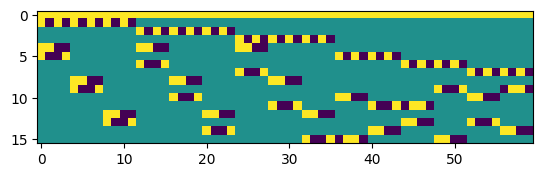

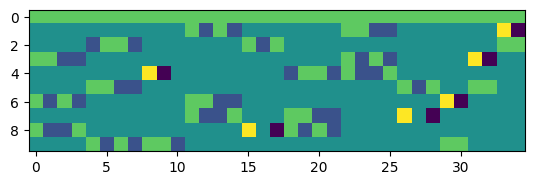

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from exputils.perm_Amat import get_perm_Amat
from exputils.actual_Amat import get_actual_Amat

Amat = get_actual_Amat(2).todense()
qmat = get_perm_Amat(2).todense()

plt.imshow(Amat)
plt.show()
plt.imshow(qmat)
plt.show()

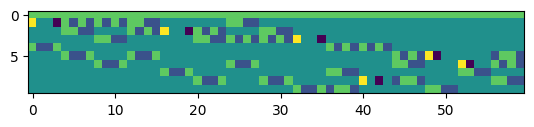

35


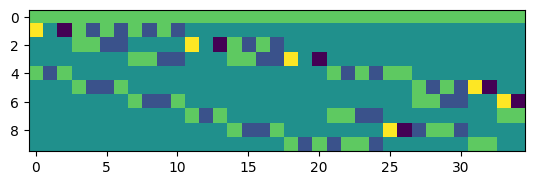

In [38]:
idxs = [
    [0],  # II
    [1, 4],  # IX,XI
    [2, 8],  # IY,YI
    [3, 12],  # IZ,ZI
    [5],  # XX
    [6, 9],  # XY,YX
    [7, 13],  # XZ,ZX
    [10],  # YY
    [11, 14],  # YZ,ZY
    [15],  # ZZ
]

rev = [-1 for _ in range(16)]
for i, idx in enumerate(idxs):
    for j in idx:
        rev[j] = i

Amat2 = np.zeros((len(idxs), Amat.shape[1]))
for i, col in enumerate(Amat.T):
    for j in range(16):
        Amat2[rev[j], i] += col[0, j]
plt.imshow(Amat2)
plt.show()

cols_set = set(tuple(col.astype(np.int16)) for col in Amat2.T)
print(len(cols_set))

Amat3 = np.zeros((len(idxs), len(cols_set)))
cols_set2 = set()
for col in Amat2.T:
    col = tuple(col.astype(np.int16))
    if col not in cols_set2:
        cols_set2.add(col)
        Amat3[:, len(cols_set2) - 1] = col
plt.imshow(Amat3)
plt.show()

In [67]:
from scipy.sparse import coo_matrix

A = coo_matrix(Amat3)

val_to_idx = {}
val_to_idx[+2] = 0
val_to_idx[+1] = 1
val_to_idx[-1] = 2
val_to_idx[-2] = 3

print("\\foreach \\color/\\col/\\row in {")
for i, (val, row, col) in enumerate(zip(A.data, A.row, A.col)):
    idx = val_to_idx[val.real]
    print(f"c{idx}", col, -row, sep="/", end="")
    if i != A.nnz - 1:
        print(",")
    else:
        print("\n}{")

\foreach \color/\col/\row in {
c1/0/0,
c1/1/0,
c1/2/0,
c1/3/0,
c1/4/0,
c1/5/0,
c1/6/0,
c1/7/0,
c1/8/0,
c1/9/0,
c1/10/0,
c1/11/0,
c1/12/0,
c1/13/0,
c1/14/0,
c1/15/0,
c1/16/0,
c1/17/0,
c1/18/0,
c1/19/0,
c1/20/0,
c1/21/0,
c1/22/0,
c1/23/0,
c1/24/0,
c1/25/0,
c1/26/0,
c1/27/0,
c1/28/0,
c1/29/0,
c1/30/0,
c1/31/0,
c1/32/0,
c1/33/0,
c1/34/0,
c0/0/-1,
c3/2/-1,
c1/3/-1,
c2/4/-1,
c1/5/-1,
c2/6/-1,
c1/7/-1,
c2/8/-1,
c1/9/-1,
c2/10/-1,
c1/3/-2,
c1/4/-2,
c2/5/-2,
c2/6/-2,
c0/11/-2,
c3/13/-2,
c1/14/-2,
c2/15/-2,
c1/16/-2,
c2/17/-2,
c1/7/-3,
c1/8/-3,
c2/9/-3,
c2/10/-3,
c1/14/-3,
c1/15/-3,
c2/16/-3,
c2/17/-3,
c0/18/-3,
c3/20/-3,
c1/0/-4,
c2/1/-4,
c1/2/-4,
c1/21/-4,
c2/22/-4,
c1/23/-4,
c2/24/-4,
c1/25/-4,
c1/26/-4,
c1/3/-5,
c2/4/-5,
c2/5/-5,
c1/6/-5,
c1/27/-5,
c2/28/-5,
c1/29/-5,
c2/30/-5,
c0/31/-5,
c3/32/-5,
c1/7/-6,
c2/8/-6,
c2/9/-6,
c1/10/-6,
c1/27/-6,
c1/28/-6,
c2/29/-6,
c2/30/-6,
c0/33/-6,
c3/34/-6,
c1/11/-7,
c2/12/-7,
c1/13/-7,
c1/21/-7,
c1/22/-7,
c2/23/-7,
c2/24/-7,
c1/33/-7,
c1/34/-7,
c1/14/-8,


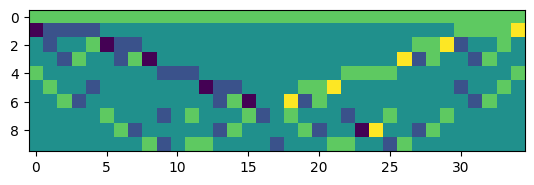

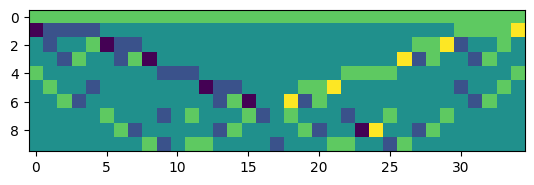

In [62]:
qmat = get_perm_Amat(2).todense()
qmat = np.array(qmat)
qmat = qmat[[0, 1, 3, 6, 2, 4, 7, 5, 8, 9]]
Amat3_sorted = np.array(sorted(Amat3.T, key=lambda x: tuple(x))).T
qmat_sorted = np.array(sorted(qmat.T, key=lambda x: tuple(x))).T
plt.imshow(Amat3_sorted)
plt.show()
plt.imshow(qmat_sorted)
plt.show()